Simple Sentiment Analysis using VADER(Valence Aware Dictionary and Sentiment Reasoner)
--

Here, we will use the VADER python library to write a sentiment analysis model that can provide a sentiment rating to tweets made by airline customers. The VADER python library is utilised to design a simple sentiment analysis model that provide sentiment ratings to tweets made by airline customers. <b>2 main steps</b> are made to generate the sentiment analysis:

1. Data Ingestion
2. VADER Sentiment Analysis
3. Evaluating Model Accuracy (optional)

Install and import vaderSentiment library

In [11]:
# Uncomment the installation code and run it if it is not installed
#!pip install vaderSentiment

Thereafter, we will import all libraries which we will be using

In [12]:
import pandas as pd
import vaderSentiment

1.Data Ingestion
--


In [13]:
# Read data from CSV into dataframe
pd.set_option('display.max_colwidth', None)
tweets_df = pd.read_csv("data/labelled_tweets.csv")
tweets_df

,id,tweet,label
0,80938,"@united I'm having issues. Yesterday I rebooked for 24 hours after I was supposed to fly, now I can't log on &amp; check in. Can you help?",0
1,10959,"@united kinda feel like the $6.99 you charge for in flight Wi-Fi is ridiculous. AND it sucks, slow, or doesn't work. #anythingtomakeabuck",0
2,130813,"Livid in Vegas, delayed, again&amp; again&amp;again, @SouthwestAir decided to cancel a flight and combine two, then waited on crew, now pilots.",0
3,146589,@united the most annoying man on earth is on my flight. what can you do to help me?,0
4,117579,"@united The last 2 weeks I've flown wit u, you have given me 4 reasons to convince me it was a bad decision. Time 2 go back 2 @SouthwestAir",0
...,...,...,...
3395,171958,@SubTheGamer @united completely pathetic! I'm apalled and DISGUSTED at what I just read. I'm sorry this had to happen to the fellow sister!,1
3396,172278,@QuranWeekly @united Too many bigots in America. I was raised in Idaho. Worse than Alabama.,1
3397,172327,@SangyeH @united I would too. My sister converted to Islam. She is the sweetest girl on earth so I would never judge,1
3398,172403,Ã¢â‚¬Å“@hindukid1021: prime example of our world today @united http://t.co/w8RBIeHPH1Ã¢â‚¬Â this is so sad,1


2.VADER Sentiment Analysis
--
Instantiate a <code>SentimentIntensityAnalyzer</code> object and store it within the variable <code>analyser</code>.

In [14]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

Essentially, all we need to do is pass the sentence we want to derive the sentiments rating of to the <code>polarity_scores()</code> function of the <b>VADER library</b>. Let's illustrate how this works with a toy example:

<div class="alert alert-block alert-warning">
As can be observed, <b>VADER</b> determined this sentence to be highly positive with a compound score of 0.9157. Recall that the compound score is the sum of all of the lexicon ratings which have been standardised to range between -1 and 1.</div>

Now let's try applying the sentiment analysis to the tweets of airline customers. First, we need to:
- add a column to the dataframe to hold the sentiment score

In [15]:
tweets_df['predicted_sentiments'] = ''
tweets_df

,id,tweet,label,predicted_sentiments
0,80938,"@united I'm having issues. Yesterday I rebooked for 24 hours after I was supposed to fly, now I can't log on &amp; check in. Can you help?",0,
1,10959,"@united kinda feel like the $6.99 you charge for in flight Wi-Fi is ridiculous. AND it sucks, slow, or doesn't work. #anythingtomakeabuck",0,
2,130813,"Livid in Vegas, delayed, again&amp; again&amp;again, @SouthwestAir decided to cancel a flight and combine two, then waited on crew, now pilots.",0,
3,146589,@united the most annoying man on earth is on my flight. what can you do to help me?,0,
4,117579,"@united The last 2 weeks I've flown wit u, you have given me 4 reasons to convince me it was a bad decision. Time 2 go back 2 @SouthwestAir",0,
...,...,...,...,...
3395,171958,@SubTheGamer @united completely pathetic! I'm apalled and DISGUSTED at what I just read. I'm sorry this had to happen to the fellow sister!,1,
3396,172278,@QuranWeekly @united Too many bigots in America. I was raised in Idaho. Worse than Alabama.,1,
3397,172327,@SangyeH @united I would too. My sister converted to Islam. She is the sweetest girl on earth so I would never judge,1,
3398,172403,Ã¢â‚¬Å“@hindukid1021: prime example of our world today @united http://t.co/w8RBIeHPH1Ã¢â‚¬Â this is so sad,1,


Next, we need to:
- iterate through the tweet column in the dataframe, 
- derive a sentiment score for each of them and 
- assign the calculated sentiments(compound score) from <code>polarity_scores</code> function to the <code>predicted_sentiments</code> column in the dataframe

In [16]:
analyser = SentimentIntensityAnalyzer()

for index, row in tweets_df.iterrows():
    
    sentiments = analyser.polarity_scores(row['tweet'])                   # calculate sentiments of the tweet
    tweets_df.at[index, 'predicted_sentiments'] = sentiments['compound']  # extract the compound score and assgin to predicted_sentiments column

tweets_df

,id,tweet,label,predicted_sentiments
0,80938,"@united I'm having issues. Yesterday I rebooked for 24 hours after I was supposed to fly, now I can't log on &amp; check in. Can you help?",0,0.6705
1,10959,"@united kinda feel like the $6.99 you charge for in flight Wi-Fi is ridiculous. AND it sucks, slow, or doesn't work. #anythingtomakeabuck",0,0.0056
2,130813,"Livid in Vegas, delayed, again&amp; again&amp;again, @SouthwestAir decided to cancel a flight and combine two, then waited on crew, now pilots.",0,-0.7506
3,146589,@united the most annoying man on earth is on my flight. what can you do to help me?,0,0.3626
4,117579,"@united The last 2 weeks I've flown wit u, you have given me 4 reasons to convince me it was a bad decision. Time 2 go back 2 @SouthwestAir",0,0.0772
...,...,...,...,...
3395,171958,@SubTheGamer @united completely pathetic! I'm apalled and DISGUSTED at what I just read. I'm sorry this had to happen to the fellow sister!,1,-0.8025
3396,172278,@QuranWeekly @united Too many bigots in America. I was raised in Idaho. Worse than Alabama.,1,-0.0772
3397,172327,@SangyeH @united I would too. My sister converted to Islam. She is the sweetest girl on earth so I would never judge,1,0.4215
3398,172403,Ã¢â‚¬Å“@hindukid1021: prime example of our world today @united http://t.co/w8RBIeHPH1Ã¢â‚¬Â this is so sad,1,-0.294


3.Evaluating Model Accuracy(optional)
--

Similar to classification models, we need an abitrary threshold to classify whether the sentiment score given was positive or negative:

- First we write a function to classify if compound score is negative or positive:
- Use the <code>apply()</code> function to apply the custom function written to the <code>predicted_sentiments</code> column

In [17]:
# Custom function to classify based on compound score
def classify_sentiment_score(score):
    
    if score > 0:
        
        return 1
    
    else:
        
        return 0

In [18]:
tweets_df['predicted_sentiments'] = tweets_df['predicted_sentiments'].apply(classify_sentiment_score)
tweets_df

,id,tweet,label,predicted_sentiments
0,80938,"@united I'm having issues. Yesterday I rebooked for 24 hours after I was supposed to fly, now I can't log on &amp; check in. Can you help?",0,1
1,10959,"@united kinda feel like the $6.99 you charge for in flight Wi-Fi is ridiculous. AND it sucks, slow, or doesn't work. #anythingtomakeabuck",0,1
2,130813,"Livid in Vegas, delayed, again&amp; again&amp;again, @SouthwestAir decided to cancel a flight and combine two, then waited on crew, now pilots.",0,0
3,146589,@united the most annoying man on earth is on my flight. what can you do to help me?,0,1
4,117579,"@united The last 2 weeks I've flown wit u, you have given me 4 reasons to convince me it was a bad decision. Time 2 go back 2 @SouthwestAir",0,1
...,...,...,...,...
3395,171958,@SubTheGamer @united completely pathetic! I'm apalled and DISGUSTED at what I just read. I'm sorry this had to happen to the fellow sister!,1,0
3396,172278,@QuranWeekly @united Too many bigots in America. I was raised in Idaho. Worse than Alabama.,1,0
3397,172327,@SangyeH @united I would too. My sister converted to Islam. She is the sweetest girl on earth so I would never judge,1,1
3398,172403,Ã¢â‚¬Å“@hindukid1021: prime example of our world today @united http://t.co/w8RBIeHPH1Ã¢â‚¬Â this is so sad,1,0


Use of the <code>sklearn.metrics</code> to evaluate the accuracy of the simple sentiment analysis model.

In [19]:
from sklearn.metrics import accuracy_score

accuracy_score(tweets_df['label'], tweets_df['predicted_sentiments'])

0.6082352941176471

Accuracy of our VADER sentiment analysis model is approximately 61%</div>, using:
- True positive
- True negative
- False positive
- False negative

In [20]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(tweets_df['label'], tweets_df['predicted_sentiments']).ravel()
(tn, fp, fn, tp)

(1148, 552, 780, 920)

Generate confusion matrix visualisation using matplotlib and mlxtend library

In [21]:
# Uncomment the code below and run it if it is not installed
#!pip install mlxtend

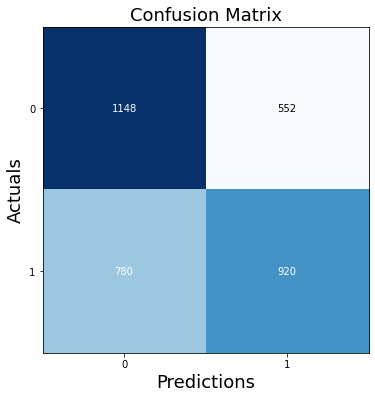

In [22]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

# First we generate a confusion matrix
conf_matrix = confusion_matrix(tweets_df['label'], tweets_df['predicted_sentiments'])

# Next we plot the confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6))
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()